In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv('dataset.csv')
df.columns=[column.strip() for column in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


<Axes: title={'center': 'bmi'}, xlabel='work_type'>

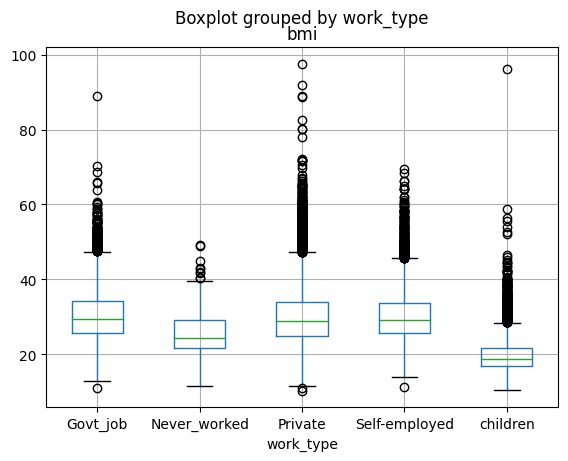

In [6]:
df.boxplot(by='work_type',column=['bmi'])

In [ ]:
# imbalanced data
df.groupby(['stroke']).count()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,42617,42617,42617,42617,42617,42617,42617,42617,42617,41295,29470
1,783,783,783,783,783,783,783,783,783,643,638


In [4]:
df.groupby(['smoking_status']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
formerly smoked,7493,7493,7493,7493,7493,7493,7493,7493,7493,7099,7493
never smoked,16053,16053,16053,16053,16053,16053,16053,16053,16053,15747,16053
smokes,6562,6562,6562,6562,6562,6562,6562,6562,6562,6226,6562


In [19]:
# Drop the 'id' column as it is not useful for prediction
df = df.drop(columns=['id'])


In [21]:
# Handling missing values in 'bmi' and 'smoking_status'
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'].fillna('unknown', inplace=True)


In [22]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [34]:
from scipy import stats

z_scores_age = stats.zscore(df['age'])
outliers_age = (np.abs(z_scores_age) > 3)

z_scores_glucose = stats.zscore(df['avg_glucose_level'])
outliers_glucose = (np.abs(z_scores_glucose) > 3)

z_scores_bmi = stats.zscore(df['bmi'])
outliers_bmi = (np.abs(z_scores_bmi) > 3)

# Remove outliers
df = df[~(outliers_age | outliers_glucose | outliers_bmi)]

In [35]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create an SVM model
svm_model = SVC(class_weight='balanced', random_state=42,kernel='rbf')
svm_model.fit(X_train_scaled,y_train)
y_predict=svm_model.predict(X_test_scaled)
score = accuracy_score(y_test,y_predict)
print("Accuracy:", score)

Accuracy: 0.781215556605259
